In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Примение операторов Лапласа, Собеля, Робертса и Превитта

In [2]:
img = cv2.imread ('images/Titanic.jpg')

Сначала составим маски(ядра) для оператора Превитта (kernel1 и kernel2) и для оператора Робертса (kernel3 и kernel4)

In [3]:
kernel1 = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
kernel2 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

kernel3 = np.array([[-1, 0], [0, 1]])
kernel4 = np.array ([[0, -1], [1, 0]])

Теперь применим их к изображению функцией cv2.filter2D() - функцией соединения изображения с ядром, здесь 1 – это
глубина изображения (если значение отрицательное, то глубина соответствует исходному изображению)

In [4]:
img_prewittx = cv2.filter2D(img, -1, kernel1)
img_prewitty = cv2.filter2D(img, -1, kernel2)

img_robx = cv2.filter2D(img, -1, kernel3)
img_roby = cv2.filter2D(img, -1, kernel4)

Для примения оператора Собеля воспользуемся функцией cv2.Sobel(). Для предотварщения возникновения ошибок нормализуем предварительно  изображение функцией cv2.normalize(). Нормализация - это процесс, который изменяет диапазон значения интенсивности пикселей.

In [5]:
sobel_vertical = cv2.normalize(
    img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U
)
sobel_vertical = cv2.Sobel(
    sobel_vertical, cv2.CV_64F, 1, 0, ksize=5
)
sobel_vertical = cv2.normalize(
    sobel_vertical, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U
)

sobel_horizontal = cv2.normalize(
    img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U
)
sobel_horizontal = cv2.Sobel(
    sobel_horizontal, cv2.CV_64F, 0, 1, ksize=5
)
sobel_horizontal = cv2.normalize(
    sobel_horizontal, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U
)

Аналогично воспользуемся функцией cv2.Laplacian

In [6]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

Осталось отобразить результаты с помощью matplotlib.pyplot

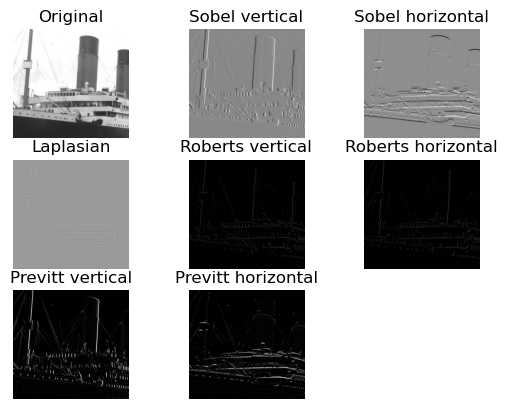

In [7]:
plt.subplot(331),plt.imshow(img),plt.title('Original')
plt.axis('off')
plt.subplot(332),plt.imshow(sobel_vertical),plt.title('Sobel vertical')
plt.axis('off')
plt.subplot(333),plt.imshow(sobel_horizontal),plt.title('Sobel horizontal')
plt.axis('off')
plt.subplot(334),plt.imshow(laplacian),plt.title('Laplasian')
plt.axis('off')
plt.subplot(335),plt.imshow(img_roby),plt.title('Roberts vertical')
plt.axis('off')
plt.subplot(336),plt.imshow(img_robx),plt.title('Roberts horizontal')
plt.axis('off')
plt.subplot(337),plt.imshow(img_prewitty),plt.title('Previtt vertical')
plt.axis('off')
plt.subplot(338),plt.imshow(img_prewittx),plt.title('Previtt horizontal')
plt.axis('off')
plt.show()